# Logistic Regression

http://cs229.stanford.edu/notes/cs229-notes1.pdf

### For mathematical proof visit above link 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mean and covariance Matrix

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.4]])

mean_02 = np.array([3,4.5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

### Random multivariate normal distribution

In [3]:
dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

### Data Visualization

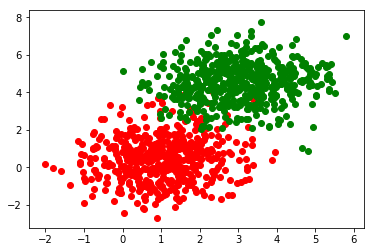

In [4]:
plt.scatter(dist_01[:,0],dist_01[:,1],color='red')
plt.scatter(dist_02[:,0],dist_02[:,1],color='green')
plt.show()


In [5]:
total = dist_01.shape[0] + dist_02.shape[0]
print(total)


1000


In [6]:
data = np.zeros((total,3))
print(data.shape)

(1000, 3)


In [7]:
data[:500,:-1] = dist_01
data[500:,:-1] = dist_02
data[500:,-1] = 1

In [8]:
print(data)

[[ 1.52033990e+00  1.42464639e+00  0.00000000e+00]
 [ 5.69714053e-01 -1.77250820e+00  0.00000000e+00]
 [ 6.07866236e-01 -6.91851462e-01  0.00000000e+00]
 ...
 [ 3.72087570e-03  5.11951750e+00  1.00000000e+00]
 [ 1.79059921e+00  4.79937947e+00  1.00000000e+00]
 [ 9.38460757e-01  3.85252306e+00  1.00000000e+00]]


In [9]:
np.random.shuffle(data)
print(data)

[[ 1.19258425 -0.82564626  0.        ]
 [ 4.07585257  4.69366813  1.        ]
 [ 0.51205337  1.22420158  0.        ]
 ...
 [-0.61740995  1.52686794  0.        ]
 [ 5.30789837  4.73094218  1.        ]
 [ 2.77864798  4.68162166  1.        ]]


## Normalize the data

In [10]:
u = np.mean(data[:,:-1],axis=0)
sigma = np.std(data[:,:-1],axis=0)

data[:,:-1] = (data[:,:-1]-u)/sigma
print(data.shape)

(1000, 3)


### stacking one for bias term

In [11]:
ones = np.ones((data.shape[0],1),dtype='float32')

In [12]:
final_data = np.hstack((ones,data))
print(final_data)

[[ 1.         -0.55865218 -1.44281115  0.        ]
 [ 1.          1.43346491  0.94746558  1.        ]
 [ 1.         -1.02884678 -0.55507342  0.        ]
 ...
 [ 1.         -1.80921924 -0.42399621  0.        ]
 [ 1.          2.28471399  0.96360804  1.        ]
 [ 1.          0.53719611  0.94224856  1.        ]]


### Data visualization after normalization

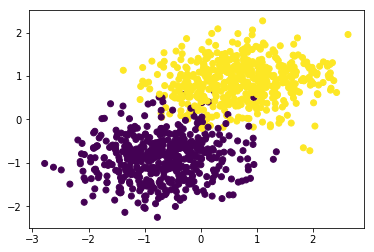

In [13]:
plt.scatter(final_data[:,1],final_data[:,2],c=final_data[:,3])
plt.show()


Spliting of Data
- training 80%
- testing 20%

In [14]:
split = int(0.8*total)
print(split)

800


In [15]:
X_train = final_data[:split,:-1]
X_test = final_data[split:,:-1]

Y_train = final_data[:split,-1]
Y_test  = final_data[split:,-1]

### Hypothesis function 

In [16]:
def hypothesis(x,w):
    h=np.dot(x,w)
    return sigmoid(h)

### Sigmoid function which convert real values into binary values

In [17]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

### Maximum log likelihood of loss function

In [18]:
def error(y_true,x,w):
    m=x.shape[0]
    err=0.0
    for i in range(m):
        hx=hypothesis(x[i],w)
        err+=y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
    return -err/m

### Update rule of log likelihood  i.e Gradient function

In [19]:
def get_grad(y_true,x,w):
    grad_w=np.zeros(w.shape)
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w)
        grad_w+=(y_true[i]-hx)*x[i]
    grad_w /=m
    return [grad_w]

# Gradient descent function 
- here we maximise theta
- This is for one iteration

In [20]:
def grad_Descent(x,y_true,w,learning_rate=0.1):
    err=error(y_true,x,w)
    [grad_w]=get_grad(y_true,x,w)
    w=w+learning_rate*grad_w
    return err,w

# Predict function

In [36]:
def predict(x,w):
    confidence=hypothesis(x,w)
    if confidence <=0.5:
        return 0
    else:
        return 1

## Accuracy function

In [37]:
def get_acc(x_tst,y_tst,w):
    y_pred=[]
    for i in range(y_tst.shape[0]):
        p=predict(x_tst[i],w)
        y_pred.append(p)
    y_pred=np.array(y_pred)
    return float((y_pred==y_tst).sum( ))/y_tst.shape[0]

In [22]:
loss=[]
acc=[]
w=2*np.random.random((X_train.shape[1],))

In [23]:
for i in range(500):
    l,w=grad_Descent(X_train,Y_train,w,learning_rate=0.3)
    acc.append(get_acc(X_test,Y_test,w))
    loss.append(l)

In [24]:
l

0.11466974406750577

# Loss curve

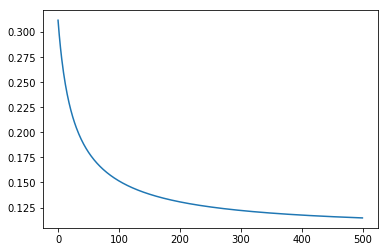

In [25]:
plt.plot(loss)

In [38]:
print(acc[-1]*100)

98.5


### Accuracy 98.5 %

In [27]:
print(w)

[-0.03522581  1.98945342  4.48607886]


In [34]:
matplotlib notebook

<IPython.core.display.Javascript object>


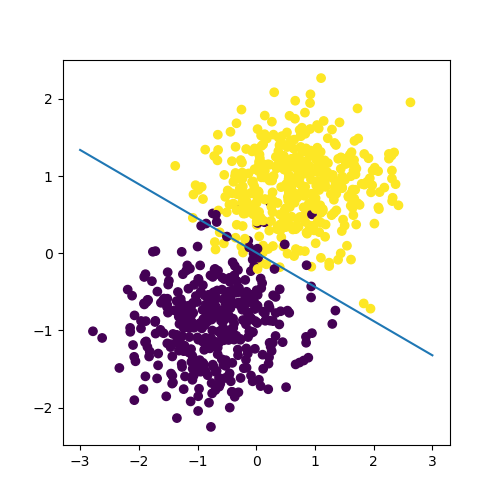

In [41]:
def drawLine():
    
    plt.figure(figsize=(5,5))
    x = np.linspace(-3,3,10)
    y = -(w[0]*1 + w[1]*x)/w[2]
    plt.scatter(X_train[:,1],X_train[:,2],c=Y_train)
    
    plt.plot(x,y)
    
drawLine()

In [42]:
print(w)


[-0.03522581  1.98945342  4.48607886]
